In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

hqDetails = pd.read_excel (r'2017-05-21-22-12-46_headquarter_details.xlsx')
hqSpecificCol = pd.DataFrame(hqDetails, columns=['HQ Company Nr','HQ Region','HQ Industry', 'HQ Insured Lives', 'HQ Pooled Lives', 'HQ Potential'])

lpDetails = pd.read_excel (r'2017-05-21-22-15-07_local_projects.xls')
lpSpecificCol = pd.DataFrame(lpDetails, columns= ['HQ Company Nr','Subsidiary Country ISO Code','LP Status', 'LP Substatus', 'LP Yearly Benefit Name Aggregated', 'LP Yearly Data Insured Lives','LP Yearly Data Pooling Status', 'LP Yearly Data Annual Premium (LCY)','LP Yearly Data Currency'])

currencyFile = pd.read_excel (r'2017-05-21-21-47-39_pla_currencies.xlsx', columns=['Currency Iso code', 'Production NWP'])

In [2]:
joinedSheet = lpSpecificCol.merge(hqSpecificCol, how="left", on="HQ Company Nr")
joinedSheet

,HQ Company Nr,Subsidiary Country ISO Code,LP Status,LP Substatus,LP Yearly Benefit Name Aggregated,LP Yearly Data Insured Lives,LP Yearly Data Pooling Status,LP Yearly Data Annual Premium (LCY),LP Yearly Data Currency,HQ Region,HQ Industry,HQ Insured Lives,HQ Pooled Lives,HQ Potential
0,1030753,AT,Contract,In action,Old age pensions,10.0,NaN,NaN,EUR,N-America,Unknown migration,3750.0,1228.0,1138.9
1,1814390,CH,Contract,Terminated,NaN,NaN,NaN,NaN,NaN,N-Europe,Other,254.0,154.0,90.0
2,1030890,CN,Contract,In action,"Lump sum death, Medical, Critical illness, Acc...",1050.0,NaN,580818.0,CNY,Europe,"Textiles, Leatherware, Jewelry",2677.0,1219.0,0.0
3,1002717,SE,Contract,In action,"Lump sum death, Medical, Old age pensions",4.0,NaN,571704.0,SEK,Europe,"Banking, Finance, Insurance, Consult",4.0,0.0,0.0
4,1030512,AT,Contract,In action,"Disability pensions, Lump sum death",22.0,NaN,19000.0,EUR,N-Europe,"Chemicals, Pharmaceuticals, Cosmetics",1641.0,143.0,6122.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36652,3016668,FR,Opportunity,Lost,"Disability pensions, Lump sum death, Medical",511.0,NaN,744283.0,EUR,N-America,Other,440.0,0.0,6074.2
36653,3016668,CH,Opportunity,In process,Accidental death and dismemberment,10.0,NaN,NaN,CHF,N-America,Other,440.0,0.0,6074.2
36654,3016668,HK,Opportunity,Lost,"Lump sum death, Accidental death and dismember...",75.0,NaN,314831.0,HKD,N-America,Other,440.0,0.0,6074.2
36655,3016668,HK,Opportunity,Lost,Medical,187.0,NaN,1280592.0,HKD,N-America,Other,440.0,0.0,6074.2


In [3]:
joinedSheet.shape

(36657, 14)

In [4]:
#dropping NaN values because the joinesSheet has 36657 rows, huge data, so dropping won't make any difference
#we are dropping data entry (row), not the variable
#if the row number was not this much we would have handled this
#replacing this with avg like
#mean=joinedSheet['LP Yearly Data Insured Lives'].mean()
#joinedSheet['LP Yearly Data Insured Lives'],replace(np.nan, mean)
#joinedSheet= joinedSheet[joinedSheet['LP Yearly Data Insured Lives'].mean()] --as it consists of numeric value
#for values that are not numeric, we use mode
#replaced based on other methods

joinedSheet.dropna(subset=["HQ Company Nr"], axis=0, inplace=True)
joinedSheet.dropna(subset=["LP Yearly Data Currency",
                           'Subsidiary Country ISO Code',
                           'LP Status',
                           'LP Substatus', 
                           'LP Yearly Benefit Name Aggregated', 
                           'LP Yearly Data Insured Lives',
                           'LP Yearly Data Pooling Status', 
                           'LP Yearly Data Annual Premium (LCY)',
                           "HQ Industry",
                           'HQ Insured Lives', 
                           'HQ Pooled Lives', 
                           'HQ Potential'], axis=0, inplace=True)


joinedSheet.shape

(5273, 14)

In [5]:
#DATA FORMATTING
#when?
#NY-NewYork-newyork
#unit conversion like:
#dg["smt"]=235/df["smt"]
#unit conversion for currency
# removing NaN values from exchange rates
currencyFile = currencyFile[currencyFile['Production NWP'].notna()]
joinedSheet = joinedSheet.reset_index(drop=True)

for i in joinedSheet.index:
    joinedSheet['LP Yearly Data Annual Premium (LCY)'].iloc[i] = ((joinedSheet['LP Yearly Data Annual Premium (LCY)'].iloc[i])*((currencyFile.loc[currencyFile['Currency Iso code'] == joinedSheet['LP Yearly Data Currency'].iloc[i], 'Production NWP']).iloc[0]))

#del joinedSheet['LP Yearly Data Currency']
print(joinedSheet.shape)

#df.rename(columns={"smt":"newname"}, inplace=True)
#joinedSheet.rename(columns={"LP Yearly Data Single Premium":"Converted LP Yearly Data Single Premium"}, inplace=True)

#incorrect data types assigned to a feature
#df["a"]=df["a"].astype("int")


G:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(5273, 14)


In [6]:
#astype
#joinedSheet.describe()
joinedSheet["HQ Company Nr"].tail(5)


5268    1030602
5269    1030699
5270    1817463
5271    1817463
5272    1030069
Name: HQ Company Nr, dtype: int64

In [7]:
joinedSheet["Subsidiary Country ISO Code"]


0       TR
1       AT
2       AT
3       AT
4       ID
        ..
5268    NO
5269    NO
5270    ZA
5271    ZA
5272    ZA
Name: Subsidiary Country ISO Code, Length: 5273, dtype: object

In [8]:
joinedSheet["LP Status"].tail(5)

5268    Contract
5269    Contract
5270    Contract
5271    Contract
5272    Contract
Name: LP Status, dtype: object

In [9]:
joinedSheet["LP Substatus"].tail(5)

5268    Terminated
5269    Terminated
5270     In action
5271     In action
5272     In action
Name: LP Substatus, dtype: object

In [10]:
joinedSheet["LP Yearly Benefit Name Aggregated"].tail(5)

5268                                       Lump sum death
5269                  Lump sum death, Lump sum disability
5270    Lump sum death, Widow/er's pensions, Lump sum ...
5271    Disability pensions, Lump sum death, Accidenta...
5272                  Disability pensions, Lump sum death
Name: LP Yearly Benefit Name Aggregated, dtype: object

In [11]:
joinedSheet["LP Yearly Data Insured Lives"].tail(5)

5268     28.0
5269      0.0
5270     63.0
5271    309.0
5272    449.0
Name: LP Yearly Data Insured Lives, dtype: float64

In [12]:
joinedSheet["LP Yearly Data Pooling Status"].tail(5)

5268    Pooled
5269    Pooled
5270    Pooled
5271    Pooled
5272    Pooled
Name: LP Yearly Data Pooling Status, dtype: object

In [13]:
joinedSheet["LP Yearly Data Annual Premium (LCY)"].tail(5)

5268      6054.56660
5269       681.23740
5270    173249.58888
5271    927513.14280
5272    245941.51224
Name: LP Yearly Data Annual Premium (LCY), dtype: float64

In [14]:
joinedSheet["LP Yearly Data Currency"].tail(5)

5268    NOK
5269    NOK
5270    ZAR
5271    ZAR
5272    ZAR
Name: LP Yearly Data Currency, dtype: object

In [15]:
joinedSheet["HQ Region"]

0          N-America
1             Europe
2          N-America
3             Europe
4             Europe
            ...     
5268        N-Europe
5269          Europe
5270    Asia-Pacific
5271    Asia-Pacific
5272          Europe
Name: HQ Region, Length: 5273, dtype: object

In [16]:
joinedSheet["HQ Industry"].tail(5)

5268              Textiles, Leatherware, Jewelry
5269    Computers, Electronics, Office Equipment
5270                                       Other
5271                                       Other
5272       Chemicals, Pharmaceuticals, Cosmetics
Name: HQ Industry, dtype: object

In [17]:
joinedSheet["HQ Insured Lives"].tail(5)

5268       87.0
5269    10161.0
5270      625.0
5271      625.0
5272    19764.0
Name: HQ Insured Lives, dtype: float64

In [18]:
joinedSheet["HQ Pooled Lives"].tail(5)

5268      87.0
5269    7240.0
5270       0.0
5271       0.0
5272    9193.0
Name: HQ Pooled Lives, dtype: float64

In [19]:
joinedSheet["HQ Potential"].tail(5)

5268     1686.3
5269    62300.0
5270    26069.6
5271    26069.6
5272    74919.8
Name: HQ Potential, dtype: float64

In [20]:
#print(joinedSheet["LP Yearly Data Annual Premium (LCY)"])
#normalization
#when two values are in different range, and doing linear regression
#the feature that has high range of values will influence the result most
#doesn't necessarily mean it's important as a predictor
#normalize variables to range between 0 to 1
#similar value range, similar intrinsic influence on analytical model

#let's see the range of some values with mean
joinedSheet["LP Yearly Data Insured Lives"].mean()

260.01384411151145

In [21]:
joinedSheet["HQ Insured Lives"].mean()


10949.837094633036

In [22]:
joinedSheet["HQ Pooled Lives"].mean()

3642.4841646121754

In [23]:
joinedSheet["HQ Potential"].mean()
#so need to normalize these values

31560.040887540206

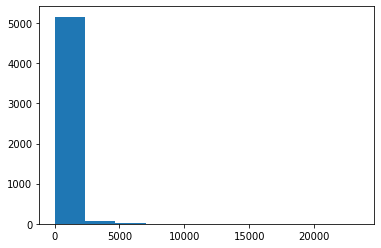

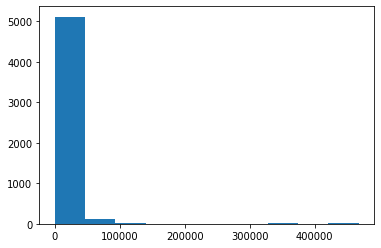

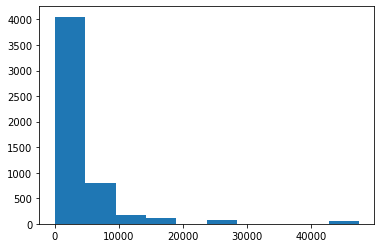

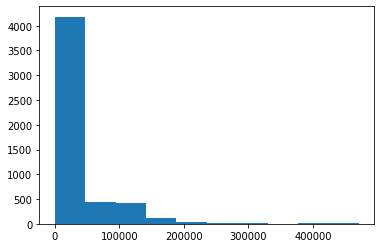

In [24]:
#normalitycheck through histogram
#not derived from gaussian distribution
#A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.
#continuous probability distribution for a real-valued random variable
from matplotlib import pyplot
pyplot.hist(joinedSheet["LP Yearly Data Insured Lives"])
pyplot.show()
pyplot.hist(joinedSheet["HQ Insured Lives"])
pyplot.show()

pyplot.hist(joinedSheet["HQ Pooled Lives"])
pyplot.show()
pyplot.hist(joinedSheet["HQ Potential"])
pyplot.show()

In [25]:
#simple feature scaling : xnew=xold/xmax
#df["a"]=df["a"]/df["a"].max()
#joinedSheet["a"]=joinedSheet["a"]/joinedSheet["a"].max()
#min-max : xnew=xold-xmin/xmax-xmin

#we will use min-max for normalization, not z-score
#because through normality check we have seen the data is not derived from gaussian distribution,
#otherwise the histogram would be a bell-curve

joinedSheet["LP Yearly Data Insured Lives"]=(joinedSheet["LP Yearly Data Insured Lives"]-joinedSheet["LP Yearly Data Insured Lives"].min())/(joinedSheet["LP Yearly Data Insured Lives"].max()-joinedSheet["LP Yearly Data Insured Lives"].min())
joinedSheet["HQ Insured Lives"]=(joinedSheet["HQ Insured Lives"]-joinedSheet["HQ Insured Lives"].min())/(joinedSheet["HQ Insured Lives"].max()-joinedSheet["HQ Insured Lives"].min())
joinedSheet["HQ Pooled Lives"]=(joinedSheet["HQ Pooled Lives"]-joinedSheet["HQ Pooled Lives"].min())/(joinedSheet["HQ Pooled Lives"].max()-joinedSheet["HQ Pooled Lives"].min())
joinedSheet["HQ Potential"]=(joinedSheet["HQ Potential"]-joinedSheet["HQ Potential"].min())/(joinedSheet["HQ Potential"].max()-joinedSheet["HQ Potential"].min())

joinedSheet.head()
#z-score/standard score= xold-avgofthefeature meu/standard deviation sigma
#value around 0, between -3 and +3
#df["a"]=df["a"]-df["a"].mean()/df["a"].std()


,HQ Company Nr,Subsidiary Country ISO Code,LP Status,LP Substatus,LP Yearly Benefit Name Aggregated,LP Yearly Data Insured Lives,LP Yearly Data Pooling Status,LP Yearly Data Annual Premium (LCY),LP Yearly Data Currency,HQ Region,HQ Industry,HQ Insured Lives,HQ Pooled Lives,HQ Potential
0,1031080,TR,Contract,Terminated,"Lump sum death, Accidental death and dismember...",0.031653,Pooled,39450.6189,TRY,N-America,Other,0.006056,0.000000,0.000458
1,1030634,AT,Contract,In action,"Disability pensions, Orphans' pensions, Widow/...",0.006868,Pooled,1549.8000,EUR,Europe,Other,0.001457,0.012118,0.813833
2,1031097,AT,Contract,In action,"Disability pensions, Orphans' pensions, Widow/...",0.000725,Pooled,1064.8800,EUR,N-America,"Motor Vehicles, Metal Products, Tools",0.003629,0.009842,0.077917
3,1030051,AT,Contract,In action,"Disability pensions, Orphans' pensions, Widow/...",0.000128,Pooled,9608.7600,EUR,Europe,"Chemicals, Pharmaceuticals, Cosmetics",0.005430,0.052538,0.010232
4,1030879,ID,Contract,Terminated,"Lump sum death, Medical, Accidental death and ...",0.008830,Pooled,0.0000,IDR,Europe,"Chemicals, Pharmaceuticals, Cosmetics",0.002779,0.016965,0.000000


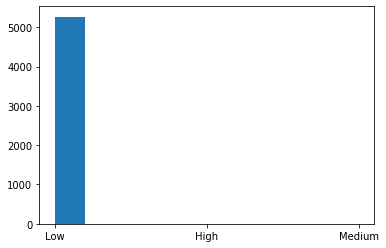

In [26]:
#binning
#bins=np.linspace(min(df["a"]), max(df["a"],4))
#groupnames=["Low", "Medium", "High"]
#df["b"]=pd.cut(df["a"], bins,labels=groupnames,include_lowest=True)
#use histogram to visualize
#most cars have low price , only very few cars have high price

bins=np.linspace(min(joinedSheet['LP Yearly Data Annual Premium (LCY)']), max(joinedSheet['LP Yearly Data Annual Premium (LCY)']),4)
groupnames=["Low", "Medium", "High"]
joinedSheet["newbin"]=pd.cut(joinedSheet["LP Yearly Data Annual Premium (LCY)"], bins,labels=groupnames,include_lowest=True)
#joinedSheet["newbin"]

pyplot.hist(joinedSheet["newbin"])
pyplot.show()

In [27]:
#pd.get_dummies(df["a"])
pd.get_dummies(joinedSheet["Subsidiary Country ISO Code"])

#EDA 
#summarize main characteristics of the data
#Gain better understanding of the dataset
#relationship between var
#extract important vars
#df.describe() nan skipped
#joinedSheet.describe()

,AE,AM,AR,AT,AU,BE,BR,CA,CH,CL,...,RU,SE,SG,SK,SV,TH,TR,TW,US,ZA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
#drive_wheel_counts=df["drive_wheels"].value_counts()
#drive_wheel_counts.rename(columns={"drive_wheels":"value counts" inplace=True})
#drive_wheel_counts.index.name='drive_wheels'

lpstatus_counts=joinedSheet["LP Status"].value_counts()
#lpstatus_counts.rename(columns={"LP Status":"value counts" inplace=True})
lpstatus_counts.index.name='lpstatus'
lpstatus_counts
#only one type of data, no influence? no need to binary/one-hot encode
#no need of making quantitative

lpstatus
Contract    5273
Name: LP Status, dtype: int64

In [29]:
lpsubstatus_counts=joinedSheet["LP Substatus"].value_counts()
#lpstatus_counts.rename(columns={"LP Status":"value counts" inplace=True})
lpsubstatus_counts.index.name='lpsubstatus'
lpsubstatus_counts
#binary encode will do(as there are only two types)/ one-hot encode
#will do one-hot encode

lpsubstatus
In action     3009
Terminated    2264
Name: LP Substatus, dtype: int64

In [30]:
#pd.get_dummies(joinedSheet["LP Substatus"])

joinedSheet['LP Substatus'] = pd.Categorical(joinedSheet['LP Substatus'])
dfDummies = pd.get_dummies(joinedSheet['LP Substatus'], prefix = 'lp_substatus_')
joinedSheet = pd.concat([joinedSheet, dfDummies], axis=1)

joinedSheet['Subsidiary Country ISO Code'] = pd.Categorical(joinedSheet['Subsidiary Country ISO Code'])
dfDummies = pd.get_dummies(joinedSheet['Subsidiary Country ISO Code'], prefix = 'ISO')
joinedSheet = pd.concat([joinedSheet, dfDummies], axis=1)

joinedSheet['HQ Region'] = pd.Categorical(joinedSheet['HQ Region'])
dfDummies = pd.get_dummies(joinedSheet['HQ Region'], prefix = 'hq_region')
joinedSheet = pd.concat([joinedSheet, dfDummies], axis=1)

joinedSheet.shape

(5273, 79)

In [31]:
lp_yearly_data_pooling_status_counts=joinedSheet["LP Yearly Data Pooling Status"].value_counts()
#lpstatus_counts.rename(columns={"LP Status":"value counts" inplace=True})
lp_yearly_data_pooling_status_counts.index.name='lp_yearly_data_pooling_status'
lp_yearly_data_pooling_status_counts
#only one type of data, no influence? no need to binary/one-hot encode
#no need of making quantitative

lp_yearly_data_pooling_status
Pooled    5273
Name: LP Yearly Data Pooling Status, dtype: int64

In [32]:
#box-plots to visualize the data
#shows the median,upper quartile shows the 75th percentile, lower quertile shows the 25th percentile
#data between upper and lower quartile represents the interquartile range
#lower and upper extreme = calculated as 1.5 times the interquartile range above the 75th percentile and 
#as 1.5times of the IQR below the 25th percentile
#outliers as individual dots occur outside upper and lower extremes
#with boxplot see outliers , skewness and distribuion of data
#makes it easier to compare between groups
#sns.boxplot(x="a", y="price", data="df")
import seaborn as sns
sns.boxplot(x="HQ Pooled Lives", y="LP Yearly Data Annual Premium (LCY)", data="joinedSheet")


AttributeError: 'str' object has no attribute 'get'

Text(0, 0.5, 'LP Yearly Data Annual Premium (LCY)')

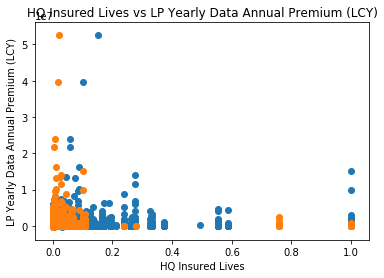

In [33]:
#scatterplot
#can x predict y?
#x predictor var y target var
#y=df[a]
#x=df[b]
#plt.scatter(x,y)
#plt.title(), plt.xlabel(), plt.ylabel()

y=joinedSheet['LP Yearly Data Annual Premium (LCY)']
x=joinedSheet['HQ Pooled Lives']
pyplot.scatter(x,y)
pyplot.title("HQ Pooled Lives vs LP Yearly Data Annual Premium (LCY)")
pyplot.xlabel("HQ Pooled Lives")
pyplot.ylabel("LP Yearly Data Annual Premium (LCY)")
#is there positive linear relationship between x and y?


y=joinedSheet['LP Yearly Data Annual Premium (LCY)']
x=joinedSheet['HQ Insured Lives']
pyplot.scatter(x,y)
pyplot.title("HQ Insured Lives vs LP Yearly Data Annual Premium (LCY)")
pyplot.xlabel("HQ Insured Lives")
pyplot.ylabel("LP Yearly Data Annual Premium (LCY)")

In [34]:
#Groupby() : applied to categorical var, group data into categories, single or multiple vars
#for different types of bodystyles and drive wheels how the avg differs?
#df_test=df[["a","b","c"]]
#df_grp=df_test.Groupby()['a','b'], as_index=False).mean()
#df_grp
#df_pivot=df_grp.pivot(index='a', columns='b')

df_test=joinedSheet[["HQ Region","Subsidiary Country ISO Code","LP Yearly Data Annual Premium (LCY)"]]
df_grp=df_test.groupby(['HQ Region','Subsidiary Country ISO Code'], as_index=False).mean()
df_grp
df_pivot=df_grp.pivot(index='HQ Region', columns='Subsidiary Country ISO Code')
df_pivot

LP Yearly Data Annual Premium (LCY)           \
Subsidiary Country ISO Code                                  AE       AM   
HQ Region                                                                  
Asia-Pacific                                                NaN      NaN   
Europe                                                5102.3920  4092.19   
LATAM                                                       NaN      NaN   
Middle East                                                 NaN      NaN   
N-America                                            33026.3155      NaN   
N-Europe                                                    NaN      NaN   
Southern Europe                                             NaN      NaN   

                                                                        \
Subsidiary Country ISO Code            AR            AT             AU   
HQ Region                                                                
Asia-Pacific                          NaN           NaN            NaN   
Europe                        3766.082624  42434.677895   58618.081060   
LATAM                                 NaN           NaN            NaN   
Middle East                           NaN           NaN            NaN   
N-America                    22383.997378  60211.905882   91617.669275   
N-Europe                      2467.935800    817.560000  279588.124200   
Southern Europe                       NaN           NaN            NaN   

                                                                          \
Subsidiary Country ISO Code             BE             BR             CA   
HQ Region                                                                  
Asia-Pacific                 173219.040000   57167.945800  165880.800000   
Europe                       148742.966250   74965.114607  349936.240000   
LATAM                                  NaN  168572.684000            NaN   
Middle East                            NaN            NaN            NaN   
N-America                    294348.147568   72104.337310  378301.752258   
N-Europe                     418097.468571   87913.260400  358111.800000   
Southern Europe                        NaN            NaN            NaN   

                                                          ...                \
Subsidiary Country ISO Code             CH            CL  ...            RU   
HQ Region                                                 ...                 
Asia-Pacific                 633147.900000           NaN  ...   2129.143680   
Europe                       445638.667448  17576.883399  ...  19985.030435   
LATAM                                  NaN   7864.071695  ...           NaN   
Middle East                            NaN           NaN  ...           NaN   
N-America                    605946.103604  48997.372400  ...  13583.509171   
N-Europe                     436645.590909  50193.228511  ...  13873.390314   
Southern Europe                        NaN           NaN  ...           NaN   

                                                                    \
Subsidiary Country ISO Code             SE            SG        SK   
HQ Region                                                            
Asia-Pacific                           NaN  99789.065000       NaN   
Europe                        73410.833333  25647.312766  15795.54   
LATAM                                  NaN           NaN       NaN   
Middle East                            NaN           NaN       NaN   
N-America                    526700.000000  49427.140645   6788.88   
N-Europe                               NaN  31579.860000       NaN   
Southern Europe                        NaN           NaN       NaN   

                                                                   \
Subsidiary Country ISO Code          SV            TH          TR   
HQ Region                                                           
Asia-Pacific                        NaN  31226.348342         NaN 

(0, 55181091.87877427)

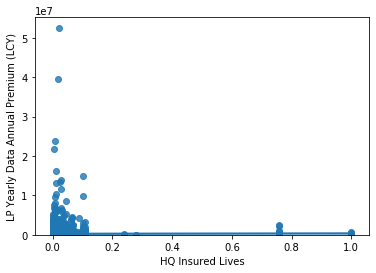

In [35]:
sns.regplot(x="HQ Insured Lives", y="LP Yearly Data Annual Premium (LCY)", data=joinedSheet)
pyplot.ylim(0,)
#negative linear relationship



(0, 55181091.87877427)

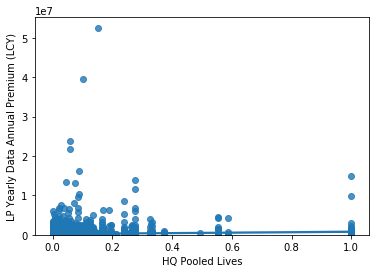

In [36]:
sns.regplot(x="HQ Pooled Lives", y="LP Yearly Data Annual Premium (LCY)", data=joinedSheet)
pyplot.ylim(0,)
#negative linear relationship

In [37]:
#strength of co-relation between continuous numerical variables : pearson correlation
#co-relation coefficient and p-value
#corelation coefficient : value close to +1: large positive relationship
#value close to -1: large neg , colse to 0: no relation
#p-value : how certain we are about the co-eff calculated
#p-value<0.001 strong certainty <0.05 moderate certainty <0.1 weak certainty  >0.1 no certainty
#strong correlation -coeff close to -1/+1p-value<0.001
#scipy stats package
from scipy import stats
pearson_coef,p_value=stats.pearsonr(joinedSheet['HQ Pooled Lives'],joinedSheet['LP Yearly Data Annual Premium (LCY)'])
pearson_coef
#weak positive relationship

0.059654094860283655

In [38]:
p_value
#strong certainty

1.4599826999919177e-05

In [39]:
#which category of a feature has most or least impact: comparison between categories of a feature
#on a prediction
#finding corelation between different groups of a categorical vaiable
#we get f-test score variation between sample group means divided by variation within sample group
#p-value: confidence degree
#large f-value : difference high between mean prices of the two categories (of car)
df_anova=joinedSheet[['HQ Region','LP Yearly Data Annual Premium (LCY)']]
grouped_anova=df_anova.groupby(['HQ Region'])
anova_results_1=stats.f_oneway(grouped_anova.get_group('N-America')['LP Yearly Data Annual Premium (LCY)'],grouped_anova.get_group('Europe')['LP Yearly Data Annual Premium (LCY)'])
anova_results_1


F_onewayResult(statistic=0.636068191007546, pvalue=0.42518019244159955)

In [40]:
joinedSheet['LP Status'].replace(to_replace =['Contract', 'Opportunity'], value =[1, 0], inplace=True)

In [41]:
joinedSheet['LP Status']

0       1
1       1
2       1
3       1
4       1
       ..
5268    1
5269    1
5270    1
5271    1
5272    1
Name: LP Status, Length: 5273, dtype: int64

In [42]:
joinedSheet = joinedSheet[joinedSheet['LP Yearly Data Annual Premium (LCY)'] <50000]
joinedSheet = joinedSheet[joinedSheet['LP Yearly Data Annual Premium (LCY)'] >100]

joinedSheet=joinedSheet[joinedSheet['LP Yearly Benefit Name Aggregated'].notna()]

In [43]:

#aggregatedBenefits =joinedSheet['LP Yearly Benefit Name Aggregated']
#joinedSheet=joinedSheet[joinedSheet['LP Yearly Benefit Name Aggregated'].notna()

# break benefit names and perform one hot encoding
aggregatedBenefits = joinedSheet['LP Yearly Benefit Name Aggregated'].tolist()
i = 0
#print(benefits)
for benefit in aggregatedBenefits:
    split_data = benefit.split(',')
    j = 0
    #print(splittedBenefits)
    for y in split_data:
        split_data[j] = y.strip()
        j = j + 1
    delimeter = '^'
    aggregatedBenefits[i] = delimeter.join(split_data)
    i = i + 1
#print(aggregatedBenefits)
#print(merged_data['LP Yearly Benefit Name Aggregated'])
joinedSheet['LP Yearly Benefit Name Aggregated'] = aggregatedBenefits
#print(joinedSheet['LP Yearly Benefit Name Aggregated'])

finalBenefit = joinedSheet['LP Yearly Benefit Name Aggregated'].str.split('^', expand=True).stack()
print(finalBenefit)
benefit = pd.get_dummies(finalBenefit, prefix='benefit').groupby(level=0).sum()


joinedSheet = pd.concat([joinedSheet, benefit], axis=1, sort=False)
del joinedSheet['LP Yearly Benefit Name Aggregated']

print(joinedSheet.shape)

#for i in range (0,572):
    #print(joinedSheet.columns[i])




0     0                        Lump sum death
      1    Accidental death and dismemberment
      2                   Lump sum disability
1     0                   Disability pensions
      1                     Orphans' pensions
                          ...                
5262  1                   Lump sum disability
5264  0                        Lump sum death
5268  0                        Lump sum death
5269  0                        Lump sum death
      1                   Lump sum disability
Length: 6685, dtype: object
(2764, 92)


In [44]:
#joinedSheet['LP Yearly Data Pooling Status'].replace(to_replace =["Pooled", np.nan], value =[1, 0], inplace=True)
joinedSheet['LP Yearly Data Pooling Status']
joinedSheet.shape

(2764, 92)

In [47]:
joinedSheet['HQ Industry'] = pd.Categorical(joinedSheet['HQ Industry'])
dfDummies = pd.get_dummies(joinedSheet['HQ Industry'], prefix = 'hq_industry')
joinedSheet = pd.concat([joinedSheet, dfDummies], axis=1)

In [49]:
joinedSheet.shape


(2764, 106)

In [51]:
for i in range (0,106):
    print(joinedSheet.columns[i])

HQ Company Nr
Subsidiary Country ISO Code
LP Status
LP Substatus
LP Yearly Data Insured Lives
LP Yearly Data Pooling Status
LP Yearly Data Annual Premium (LCY)
LP Yearly Data Currency
HQ Region
HQ Industry
HQ Insured Lives
HQ Pooled Lives
HQ Potential
newbin
lp_substatus__In action
lp_substatus__Terminated
ISO_AE
ISO_AM
ISO_AR
ISO_AT
ISO_AU
ISO_BE
ISO_BR
ISO_CA
ISO_CH
ISO_CL
ISO_CN
ISO_CO
ISO_CR
ISO_CZ
ISO_DE
ISO_DK
ISO_ES
ISO_FI
ISO_FR
ISO_GB
ISO_GR
ISO_GT
ISO_HK
ISO_HN
ISO_HU
ISO_ID
ISO_IE
ISO_IN
ISO_IT
ISO_JP
ISO_KR
ISO_LI
ISO_LU
ISO_MC
ISO_MM
ISO_MX
ISO_MY
ISO_NI
ISO_NL
ISO_NO
ISO_NZ
ISO_PA
ISO_PH
ISO_PL
ISO_PT
ISO_RU
ISO_SE
ISO_SG
ISO_SK
ISO_SV
ISO_TH
ISO_TR
ISO_TW
ISO_US
ISO_ZA
hq_region_Asia-Pacific
hq_region_Europe
hq_region_LATAM
hq_region_Middle East
hq_region_N-America
hq_region_N-Europe
hq_region_Southern Europe
benefit_Accidental death and dismemberment
benefit_Assistance
benefit_Critical illness
benefit_Disability pensions
benefit_Endowment insurance
benefit_Lump sum deat

In [53]:
joinedSheet['LP Yearly Data Pooling Status'].replace(to_replace =["Pooled", np.nan], value =[1, 0], inplace=True)


In [55]:
joinedSheet.to_csv('DD_Annual_Premium_Dataset.csv', index = False, header=True)